In [1]:
from __future__ import print_function
%matplotlib inline
import fluidsim

# Tutorial: running a simulation (user perspective)

In this tutorial, I'm going to show how to run a simple simulation with a solver that solves the 2 dimensional Navier-Stokes equations. I'm also going to present some useful concepts and objects used in FluidSim.

## A minimal simulation

Fisrt, let's see what is needed to run a very simple simulation. For the initialization (with default parameters):

In [2]:
from fluidsim.solvers.ns2d.solver import Simul
params = Simul.create_default_params()
sim = Simul(params)

*************************************
Program FluidDyn

solver NS2D, RK4 and sequential,
type fft: FFTWCY
nx =     48 ; ny =     48
Lx = 8. ; Ly = 8.
path_run =
/home/pierre/Sim_data/NS2D_L=8.x8._48x48_2015-06-26_13-41-13
init_fields.type: constant
Initialization outputs:
<class 'fluidsim.base.output.increments.Increments'> increments
<class 'fluidsim.base.output.phys_fields.PhysFieldsBase'> phys_fields
<class 'fluidsim.solvers.ns2d.output.spectra.SpectraNS2D'> spectra
<class 'fluidsim.solvers.ns2d.output.spatial_means.SpatialMeansNS2D'> spatial_means
<class 'fluidsim.solvers.ns2d.output.spect_energy_budget.SpectralEnergyBudgetNS2D'> spect_energy_budg

Memory usage at the end of init. (equiv. seq.): 71.0546875 Mo
Size of state_fft (equiv. seq.): 0.0192 Mo


And then to run the simulation:

In [3]:
sim.time_stepping.start()

*************************************
Beginning of the computation
save state_phys in file state_phys_t=000.000_it=0.hd5
    compute until t =         10
it =      0 ; t =          0 ; deltat  =   0.083333
              energy = 0.000e+00 ; Delta energy = +0.000e+00

it =      6 ; t =    1.08333 ; deltat  =        0.2
              energy = 0.000e+00 ; Delta energy = +0.000e+00
              estimated remaining duration =     0.194 s
it =     12 ; t =    2.28333 ; deltat  =        0.2
              energy = 0.000e+00 ; Delta energy = +0.000e+00
              estimated remaining duration =     0.128 s
it =     17 ; t =    3.28333 ; deltat  =        0.2
              energy = 0.000e+00 ; Delta energy = +0.000e+00
              estimated remaining duration =     0.149 s
it =     22 ; t =    4.28333 ; deltat  =        0.2
              energy = 0.000e+00 ; Delta energy = +0.000e+00
              estimated remaining duration =    0.0996 s
it =     27 ; t =    5.28333 ; deltat  =        0.2


In the following, we are going to understand these 4 lines of code... But first let's clean-up by deleting the result directory of this tiny example simulation:

In [4]:
import shutil
shutil.rmtree(sim.output.path_run)

## Importing a solver

In [5]:
from fluidsim.solvers.ns2d.solver import Simul

but there is another convenient way to import it from a string:

In [6]:
Simul = fluidsim.import_simul_class_from_key('ns2d')

## Create an instance of the class Parameters

The next step is to create an object ``params`` from the information contained in the class ``Simul``:

In [7]:
params = Simul.create_default_params()

In [8]:
[attr for attr in dir(params) if not attr.startswith('_')]

['FORCING',
 'NEW_DIR_RESULTS',
 'ONLY_COARSE_OPER',
 'beta',
 'forcing',
 'init_fields',
 'nu_2',
 'nu_4',
 'nu_8',
 'nu_m4',
 'oper',
 'output',
 'short_name_type_run',
 'time_stepping']

In [9]:
[attr for attr in dir(params) if attr.startswith('_') and not attr.startswith('__')]

['_attribs',
 '_load_from_elemxml',
 '_load_from_hdf5_file',
 '_load_from_hdf5_objet',
 '_load_from_xml_file',
 '_make_dict',
 '_make_element_xml',
 '_make_xml_text',
 '_print_as_xml',
 '_save_as_hdf5',
 '_save_as_xml',
 '_set_as_child',
 '_set_attrib',
 '_set_attribs',
 '_set_child',
 '_set_internal_attr',
 '_tag',
 '_tag_children']

In [10]:
print(type(params.nu_2))
print(type(params.output))

<type 'float'>
<class 'fluidsim.base.params.Parameters'>


In [11]:
[attr for attr in dir(params.output) if not attr.startswith('_')]

['HAS_TO_SAVE',
 'ONLINE_PLOT_OK',
 'increments',
 'period_refresh_plots',
 'periods_plot',
 'periods_print',
 'periods_save',
 'phys_fields',
 'spatial_means',
 'spect_energy_budg',
 'spectra',
 'sub_directory']

We see that the object `params` contains a tree of parameters. This tree can be represented as xml code:

In [12]:
print(params)


<params ONLY_COARSE_OPER="False" short_name_type_run="" beta="0.0" nu_2="0.0"
        NEW_DIR_RESULTS="True" nu_4="0.0" nu_8="0.0" FORCING="False"
        nu_m4="0.0">
  <oper type_fft="FFTWCY" nx="48" ny="48" coef_dealiasing="0.6666666666666666"
        TRANSPOSED_OK="True" Lx="8" Ly="8"/>  

  <init_fields available_types="['from_file', 'noise', 'constant', 'jet',
               'manual', 'dipole', 'from_simul']" type="constant">
    <from_file path=""/>  

    <noise length="0" velo_max="1.0"/>  

    <constant value="1.0"/>  

  </init_fields>

  <forcing nkmax_forcing="5" nkmin_forcing="4" key_forced="rot_fft"
           available_types="['proportional', 'random']" type=""
           forcing_rate="1">
    <random type_normalize="2nd_degree_eq"
            time_correlation="based_on_forcing_rate"/>  

  </forcing>

  <time_stepping type_time_scheme="RK4" it_end="10" USE_CFL="True" deltat0="0.2"
                 t_end="10.0" USE_T_END="True"/>  

  <output period_refresh_plots="1" 

## Set the parameters for your simulation

The user can change any parameters

In [13]:
params.nu_2 = 1e-3
params.FORCING = False

params.init_fields.type = 'noise'

params.output.periods_save.spatial_means = 1.
params.output.periods_save.spectra = 1.

In [14]:
try:
    params.this_param_does_not_exit = 10
except AttributeError as e:
    print('AttributeError:', e)

AttributeError: this_param_does_not_exit is not already set in params.
The attributes are: set(['ONLY_COARSE_OPER', 'short_name_type_run', 'beta', 'nu_2', 'NEW_DIR_RESULTS', 'nu_4', 'nu_8', 'FORCING', 'nu_m4'])
To set a new attribute, use _set_attrib or _set_attribs.


This behaviour is much safer than using a text file or a python file for the parameters. In order to discover the different parameters for a solver, create the ``params`` object containing the default parameters in Ipython (``params = Simul.create_default_params()``), print it and use the auto-completion (for example writting ``params.`` and pressing on the tab key).

## Instantiate a simulation object

The next step is to create a simulation object (an instance of the class solver.Simul) with the parameters in `params`:

In [15]:
sim = Simul(params)

*************************************
Program FluidDyn

solver NS2D, RK4 and sequential,
type fft: FFTWCY
nx =     48 ; ny =     48
Lx = 8. ; Ly = 8.
path_run =
/home/pierre/Sim_data/NS2D_L=8.x8._48x48_2015-06-26_13-41-14
init_fields.type: noise
Initialization outputs:
<class 'fluidsim.base.output.increments.Increments'> increments
<class 'fluidsim.base.output.phys_fields.PhysFieldsBase'> phys_fields
<class 'fluidsim.solvers.ns2d.output.spectra.SpectraNS2D'> spectra
<class 'fluidsim.solvers.ns2d.output.spatial_means.SpatialMeansNS2D'> spatial_means
<class 'fluidsim.solvers.ns2d.output.spect_energy_budget.SpectralEnergyBudgetNS2D'> spect_energy_budg

Memory usage at the end of init. (equiv. seq.): 73.3515625 Mo
Size of state_fft (equiv. seq.): 0.0192 Mo


which initializes everything needed to run the simulation. The object `sim` has a limited number of attributes:

In [16]:
[attr for attr in dir(sim) if not attr.startswith('_')]

['InfoSolver',
 'compute_freq_diss',
 'create_default_params',
 'info',
 'info_solver',
 'init_fields',
 'name_run',
 'oper',
 'output',
 'params',
 'state',
 'tendencies_nonlin',
 'time_stepping']

In [17]:
print(sim.info.__class__)
print([attr for attr in dir(sim.info) if not attr.startswith('_')])

<class 'fluiddyn.util.paramcontainer.ParamContainer'>
['params', 'solver']


In [18]:
sim.info.solver is sim.info_solver

True

In [19]:
sim.info.params is sim.params

True

In [20]:
print(sim.info.solver)


<solver class_name="Simul" module_name="fluidsim.solvers.ns2d.solver"
        short_name="NS2D">
  <classes>
    <Operators class_name="OperatorsPseudoSpectral2D"
               module_name="fluidsim.operators.operators"/>  

    <InitFields class_name="InitFieldsNS2D"
                module_name="fluidsim.solvers.ns2d.init_fields">
      <classes>
        <from_file class_name="InitFieldsFromFile"
                   module_name="fluidsim.base.init_fields"/>  

        <noise class_name="InitFieldsNoise"
               module_name="fluidsim.solvers.ns2d.init_fields"/>  

        <constant class_name="InitFieldsConstant"
                  module_name="fluidsim.base.init_fields"/>  

        <jet class_name="InitFieldsJet"
             module_name="fluidsim.solvers.ns2d.init_fields"/>  

        <manual class_name="InitFieldsManual"
                module_name="fluidsim.base.init_fields"/>  

        <dipole class_name="InitFieldsDipole"
                module_name="fluidsim.solvers.ns2

## Run the simulation

We can now start the time stepping. Since ``params.time_stepping.USE_T_END is True``, it should loop until ``sim.time_stepping.t`` is equal or larger than ``params.time_stepping.t_end = 10``.

In [21]:
sim.time_stepping.start()

*************************************
Beginning of the computation
save state_phys in file state_phys_t=000.000_it=0.hd5
    compute until t =         10
it =      0 ; t =          0 ; deltat  =   0.097144
              energy = 9.159e-02 ; Delta energy = +0.000e+00

it =     11 ; t =    1.09076 ; deltat  =    0.10203
              energy = 9.061e-02 ; Delta energy = -9.864e-04
              estimated remaining duration =     0.216 s
it =     21 ; t =     2.1292 ; deltat  =     0.1043
              energy = 8.968e-02 ; Delta energy = -9.244e-04
              estimated remaining duration =     0.265 s
it =     31 ; t =    3.16728 ; deltat  =    0.10186
              energy = 8.878e-02 ; Delta energy = -9.062e-04
              estimated remaining duration =     0.212 s
it =     41 ; t =    4.17421 ; deltat  =   0.099527
              energy = 8.792e-02 ; Delta energy = -8.558e-04
              estimated remaining duration =     0.201 s
it =     52 ; t =    5.25129 ; deltat  =   0.099822


## Analyze the output

Let's see what we can do with the object ``sim.output``. What are its attributes?

In [22]:
[attr for attr in dir(sim.output) if not attr.startswith('_')]

['compute_energy',
 'compute_energy_fft',
 'compute_enstrophy',
 'compute_enstrophy_fft',
 'create_list_for_name_run',
 'end_of_simul',
 'figure_axe',
 'has_been_initialized_with_state',
 'has_to_save',
 'increments',
 'init_with_initialized_state',
 'init_with_oper_and_state',
 'name_run',
 'name_solver',
 'one_time_step',
 'oper',
 'params',
 'path_run',
 'phys_fields',
 'print_size_in_Mo',
 'print_stdout',
 'sim',
 'spatial_means',
 'spect_energy_budg',
 'spectra',
 'sum_wavenumbers']

Many of these objects (`print_stdout`, `phys_fields`, `spatial_means`, `spect_energy_budg`, `spectra`, ...) were used during the simulation to save outputs. They can also load the data and produce some simple plots. For example, to display the time evolution of spatially averaged quantities (here the energy, the entrophy and their dissipation rate):

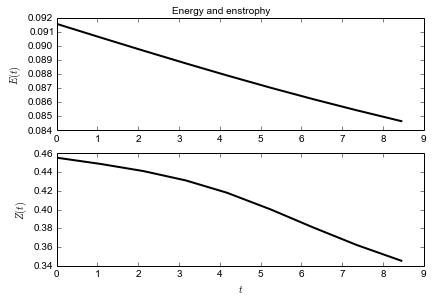

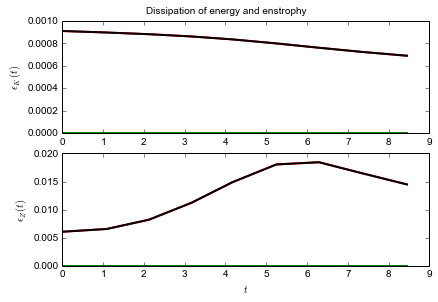

In [23]:
 sim.output.spatial_means.plot()

Finally we remove the directory of this example simulation...

In [24]:
shutil.rmtree(sim.output.path_run)